In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import matplotlib.pyplot as plt

import cv2
import numpy as np

from src.helper import read_images
from src.pith_prediction import pith_prediction


2023-04-17 15:35:42.416586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#data directory here!
data_dir = "dataset/ringsranking"

idx = 4

In [4]:
images, images_df = read_images(data_dir)
img = images[idx]
prediction = pith_prediction(img)

1/1 [==============================] - 1s 1s/step


In [5]:
# Load the image
#img = cv2.imread('tree_cross_section.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a median filter to remove noise
median = cv2.medianBlur(gray, 5)

# Apply adaptive thresholding to create a binary image
thresh = cv2.adaptiveThreshold(median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Find the contours of the rings
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image for the segmented rings
ring_segmented = np.zeros_like(img)

# Draw each contour onto the black image
for i in range(len(contours)):
    cv2.drawContours(ring_segmented, contours, i, (255, 255, 255), -1)

# Display the original image and the segmented rings

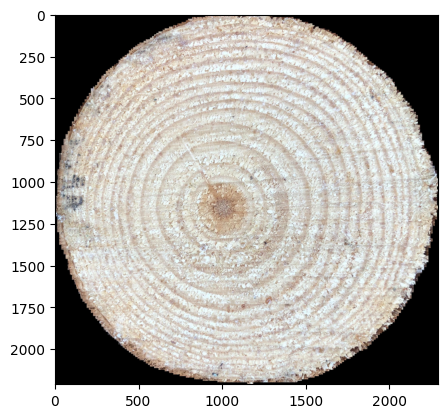

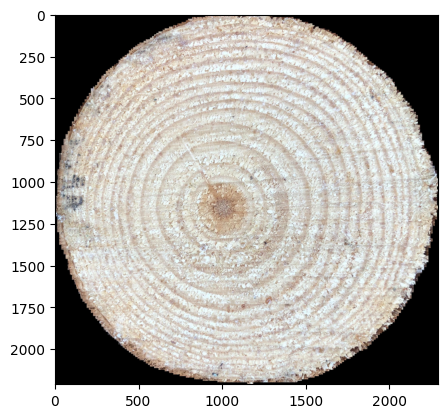

In [6]:
plt.imshow(img, cmap = 'gray')
plt.show()

plt.imshow(img)
plt.show()

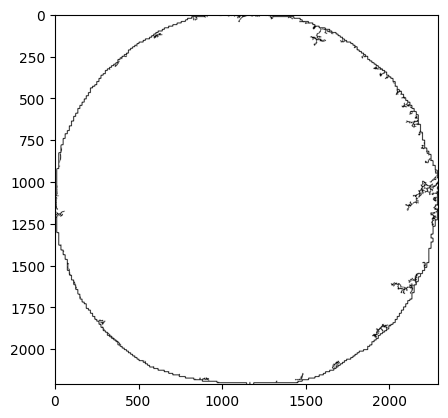

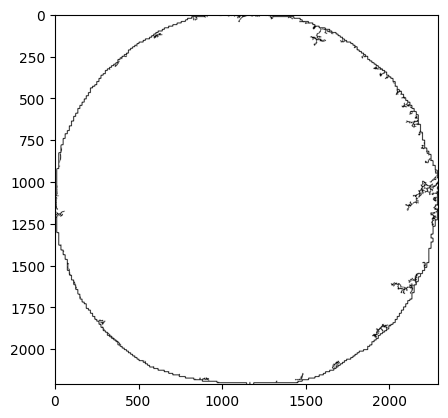

In [7]:
plt.imshow(ring_segmented, cmap = 'gray')
plt.show()

plt.imshow(ring_segmented)
plt.show()

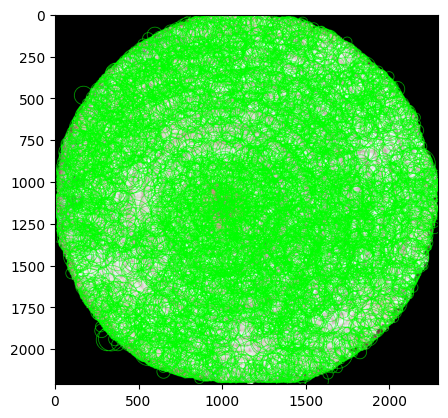

In [8]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection to detect edges
edges = cv2.Canny(blur, 50, 150)

# Apply Hough Circle Transform to detect circles
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# Draw the detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

plt.imshow(img, cmap = 'gray')
plt.show()